In [1]:
# Import library
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
# Import data dan drop kolom yang tidak digunakan
data = pd.read_csv("data_UTS.csv")
data = data.drop(data.columns[0:3], axis=1)
display(data.head(5))

,Sosial_Media,freq_Penggunaan,freq_wasting,duration_of_use,productive_duration,disturbed,freq_Postpone,freq_pastDeadline,freq_disturbed,freq_allocationTime,negative_impact
0,Tiktok,5,5,1,2,Tidak,3,1,3,2,Tidak
1,Instagram,4,4,1,7,Tidak,3,1,3,3,Ya
2,Instagram,5,4,1,3,Tidak,3,2,2,3,Tidak
3,Instagram,3,3,1,8,Tidak,3,1,2,2,Tidak
4,Instagram,3,3,1,5,Tidak,4,1,2,5,Tidak


In [3]:
# Cetak jumlah missing value pada setiap kolom
data_missing = data.isnull().sum()
for kolom, jumlah_missing in data_missing.items():
    print(f"Jumlah missing_value pada kolom '{kolom}': {jumlah_missing}")

Jumlah missing_value pada kolom 'Sosial_Media': 0
Jumlah missing_value pada kolom 'freq_Penggunaan': 0
Jumlah missing_value pada kolom 'freq_wasting': 0
Jumlah missing_value pada kolom 'duration_of_use': 0
Jumlah missing_value pada kolom 'productive_duration': 0
Jumlah missing_value pada kolom 'disturbed': 0
Jumlah missing_value pada kolom 'freq_Postpone': 0
Jumlah missing_value pada kolom 'freq_pastDeadline': 0
Jumlah missing_value pada kolom 'freq_disturbed': 0
Jumlah missing_value pada kolom 'freq_allocationTime': 0
Jumlah missing_value pada kolom 'negative_impact': 0


c:\Users\Johan RN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


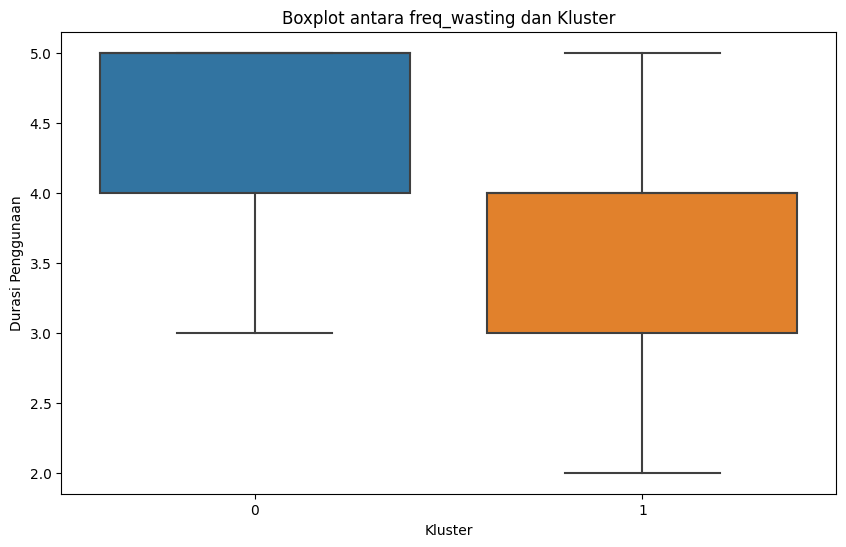

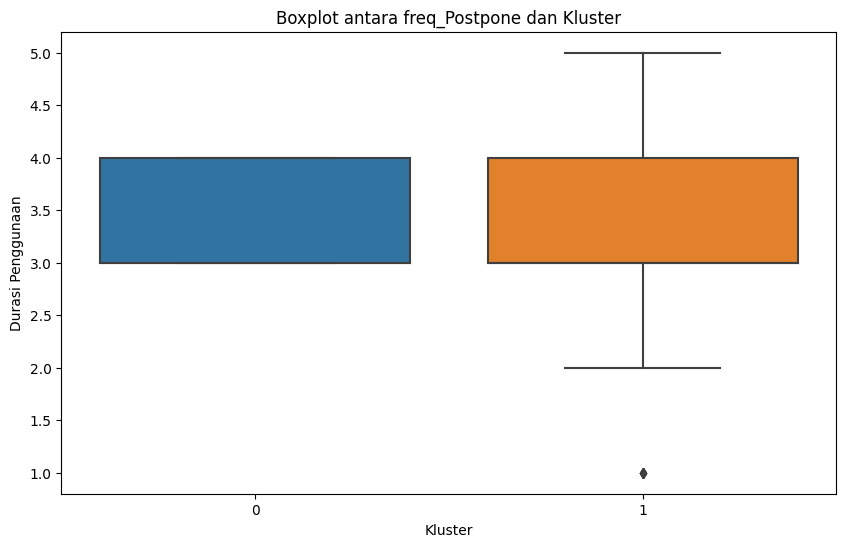

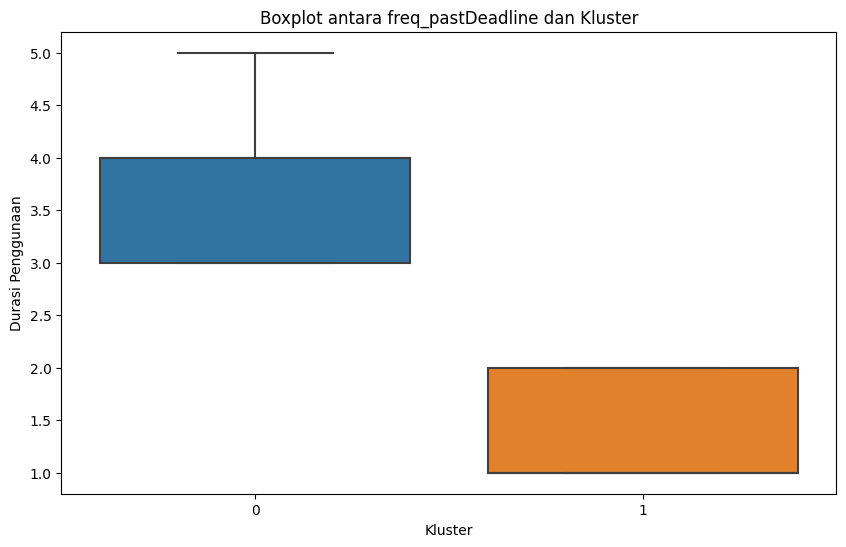

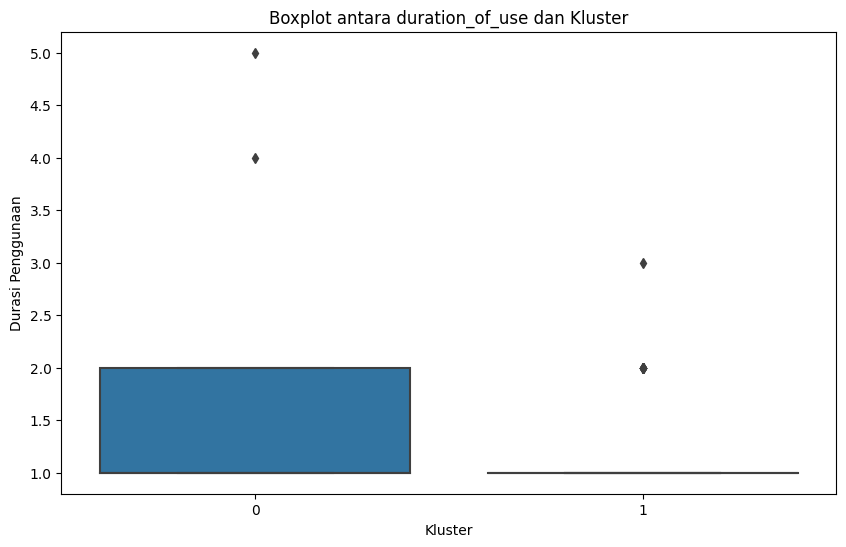

In [4]:
# Pilih kolom-kolom yang ingin Anda jadikan input (variabel independen)
input_columns = data[['freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']]

# Langkah klustering dengan K-Means
n_clusters = 2  # Ganti dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(input_columns)

# Gantilah nilai output dengan label klaster
output_column = data['cluster']

# Membuat Visualisasi Boxplot
for column in input_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=column, data=data)
    plt.title(f'Boxplot antara {column} dan Kluster')
    plt.xlabel('Kluster')
    plt.ylabel('Durasi Penggunaan')
    plt.show()

c:\Users\Johan RN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


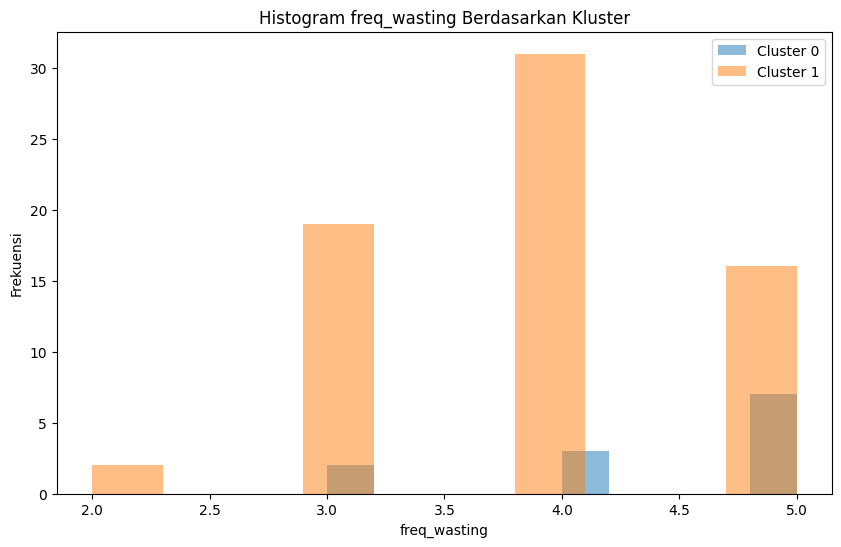

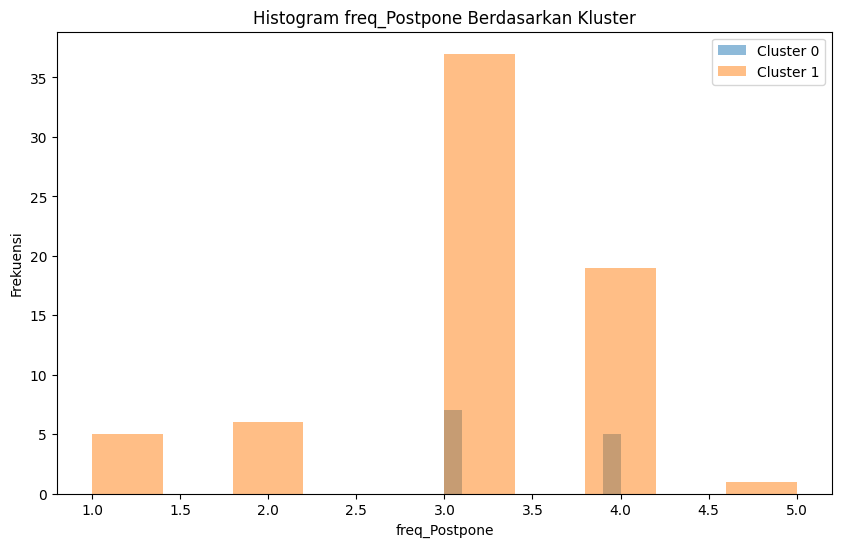

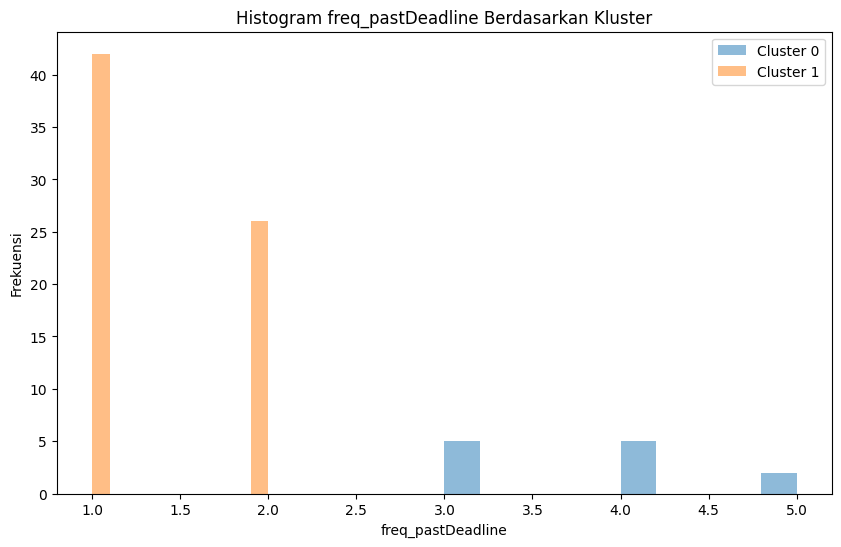

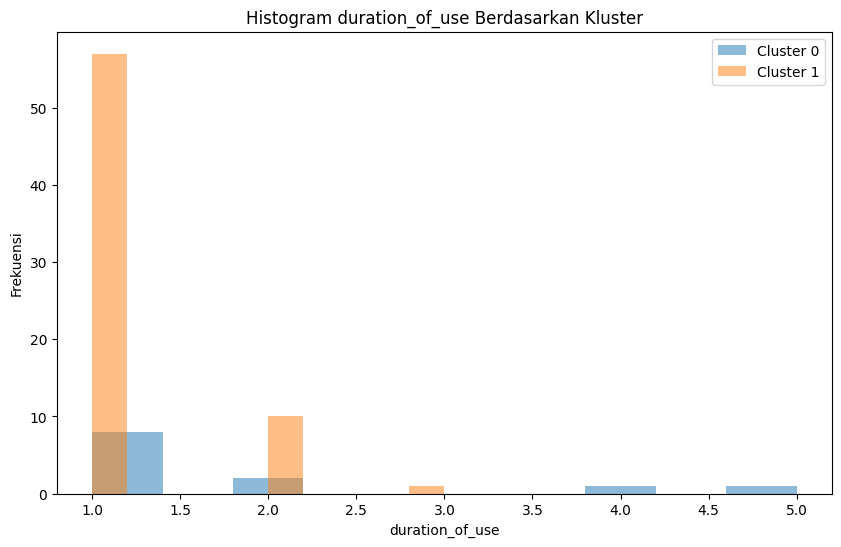

In [5]:
# Pilih kolom-kolom yang ingin Anda jadikan input (variabel independen)
input_columns = data[['freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']]

# Langkah klustering dengan K-Means
n_clusters = 2  # Ganti dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(input_columns)

# Gantilah nilai output dengan label klaster
output_column = data['cluster']

# Membuat Visualisasi Histogram
for column in input_columns:
    plt.figure(figsize=(10, 6))
    for cluster_label in range(n_clusters):
        plt.hist(data[data['cluster'] == cluster_label][column], alpha=0.5, label=f'Cluster {cluster_label}')
    plt.title(f'Histogram {column} Berdasarkan Kluster')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.show()

c:\Users\Johan RN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


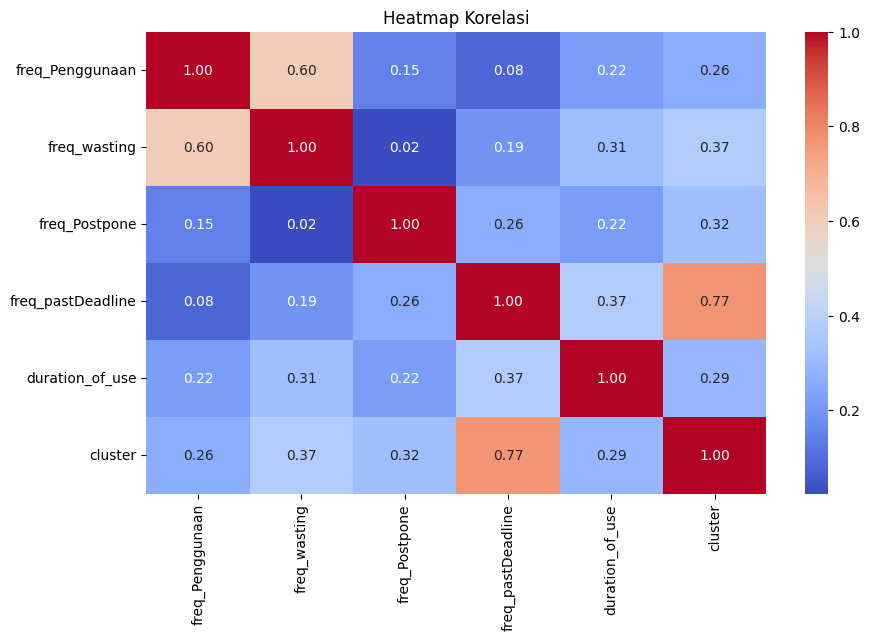

In [6]:
# Pilih kolom-kolom yang ingin Anda jadikan input (variabel independen)
input_columns = data[['freq_Penggunaan', 'freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']]

# Langkah klustering dengan K-Means
n_clusters = 2  # Ganti dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(input_columns)

# Gantilah nilai output dengan label klaster
output_column = data['cluster']

# Heatmap
selected_columns = input_columns.columns.tolist() + [output_column.name]
correlation_matrix = data[selected_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()


c:\Users\Johan RN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


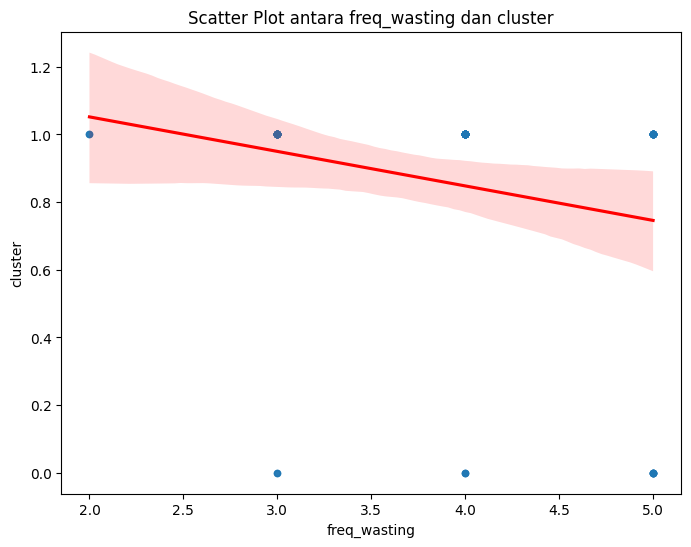

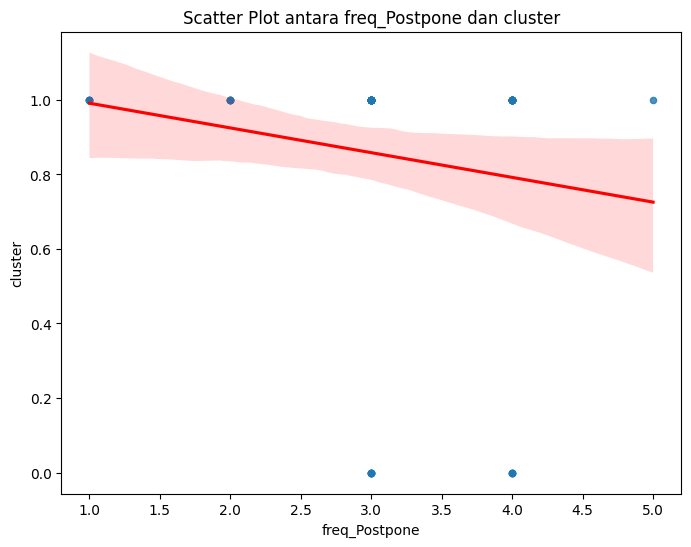

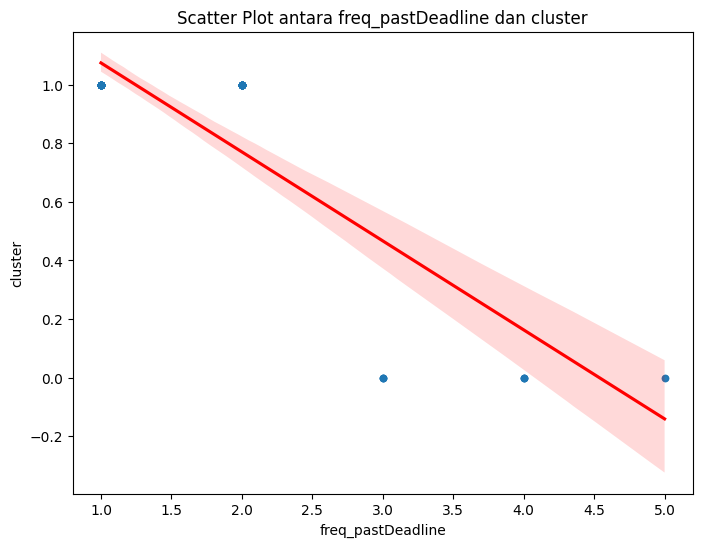

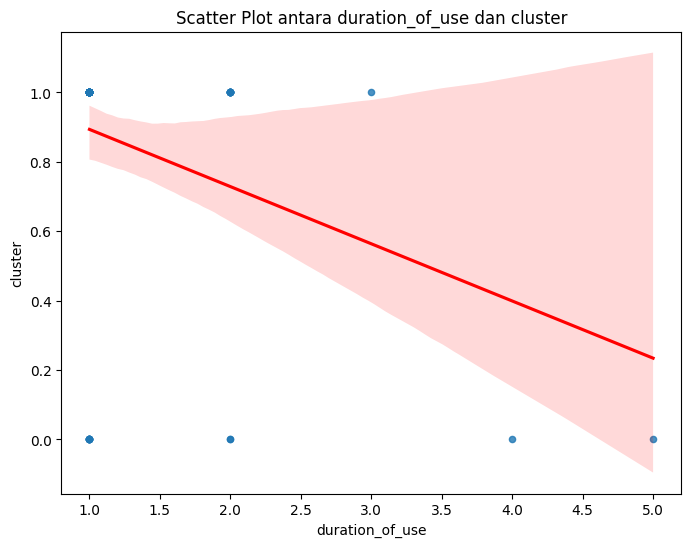

In [7]:
# Pilih kolom-kolom yang ingin Anda jadikan input (variabel independen)
input_columns = data[['freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']]

# Langkah klustering dengan K-Means
n_clusters = 2  # Ganti dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(input_columns)

# Gantilah nilai output dengan label klaster
output_column = data['cluster']

# Membuat scatter plot satu per satu dengan garis tren
for column in input_columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column, y=output_column, data=data, scatter_kws={"s": 20}, line_kws={"color": "red"})
    plt.title(f'Scatter Plot antara {column} dan cluster')
    plt.show()